In [462]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [463]:
raw_csv_data = pd.read_csv('Absenteeism_data.csv')

In [464]:
df = raw_csv_data.copy()

In [466]:
display(df)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,3,23,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,10,22,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,20,23,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,14,19,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,1,22,13/07/2015,235,11,37,239.554,29,3,1,1,8


In [467]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


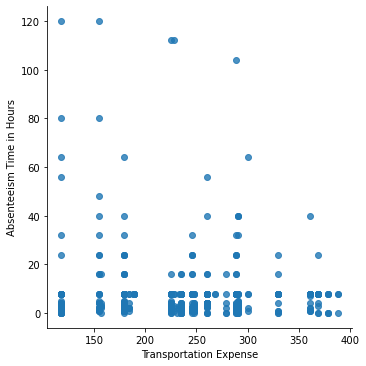

In [468]:
sns.lmplot(data=df,x='Transportation Expense',y='Absenteeism Time in Hours',fit_reg=False)

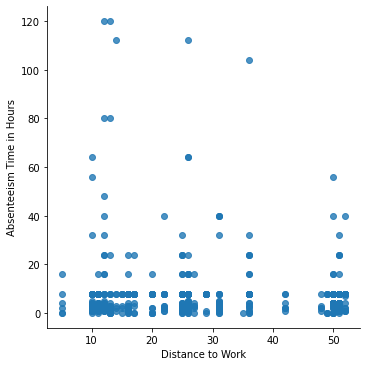

In [469]:
sns.lmplot(data=df,x='Distance to Work',y='Absenteeism Time in Hours',fit_reg=False)

In [470]:
df = df.drop(['ID'],axis = 1)

<AxesSubplot:xlabel='Reason for Absence', ylabel='count'>

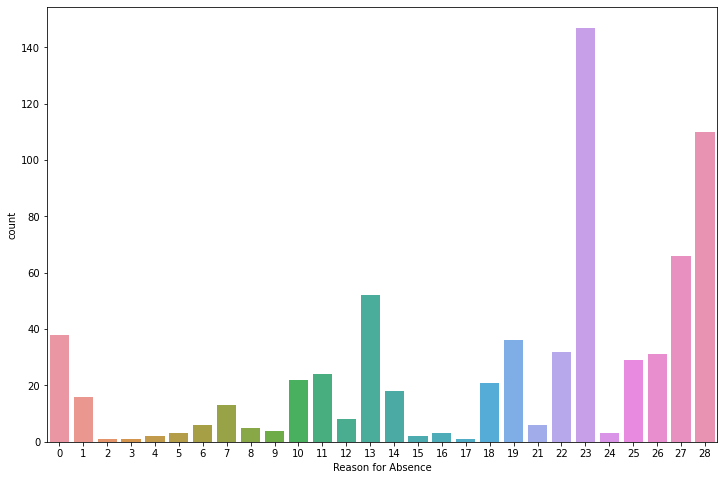

In [471]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Reason for Absence')

In [472]:
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [473]:
reason_columns = pd.get_dummies(df['Reason for Absence'],drop_first = True)
reason_columns

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [474]:
age_dummies = pd.get_dummies(df['Age'])

In [475]:
age_dummies

,27,28,29,30,31,32,33,34,36,37,38,39,40,41,43,46,47,48,49,50,58
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [476]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28])

In [477]:
reason_type_1 = reason_columns.loc[:,1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:,15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:,18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:,22:28].max(axis=1)

In [478]:
df = df.drop(['Reason for Absence'],axis=1)

In [479]:
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23/07/2015,289,36,33,239.554,30,1,2,1,2
5,10/07/2015,179,51,38,239.554,31,1,0,0,2
6,17/07/2015,361,52,28,239.554,27,1,1,4,8
7,24/07/2015,260,50,36,239.554,23,1,4,0,4
8,06/07/2015,155,12,34,239.554,25,1,2,0,40
9,13/07/2015,235,11,37,239.554,29,3,1,1,8


In [480]:
df = pd.concat([df,reason_type_1,reason_type_2,reason_type_3,reason_type_4],axis=1)
df

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1
5,10/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
6,17/07/2015,361,52,28,239.554,27,1,1,4,8,0,0,0,1
7,24/07/2015,260,50,36,239.554,23,1,4,0,4,0,0,0,1
8,06/07/2015,155,12,34,239.554,25,1,2,0,40,0,0,1,0
9,13/07/2015,235,11,37,239.554,29,3,1,1,8,0,0,0,1


In [481]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [482]:
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']


In [483]:
df.columns = column_names

In [484]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,0,0,0,1
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,1,0,0,0
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,0,0,0,1


In [485]:
column_names_reordered = ['Reason_1','Reason_2', 'Reason_3', 'Reason_4','Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']
df = df[column_names_reordered]

In [486]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [487]:
type(df['Date'][0])

str

In [488]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [489]:
df['Date']

0     2015-07-07
1     2015-07-14
2     2015-07-15
3     2015-07-16
4     2015-07-23
5     2015-07-10
6     2015-07-17
7     2015-07-24
8     2015-07-06
9     2015-07-13
10    2015-07-20
11    2015-07-14
12    2015-07-15
13    2015-07-15
14    2015-07-15
15    2015-07-17
16    2015-07-17
17    2015-07-27
18    2015-07-30
19    2015-08-05
20    2015-08-12
21    2015-08-03
22    2015-08-10
23    2015-08-14
24    2015-08-17
25    2015-08-24
26    2015-08-04
27    2015-08-12
28    2015-08-19
29    2015-08-28
30    2015-08-17
31    2015-08-27
32    2015-08-27
33    2015-08-17
34    2015-08-17
35    2015-08-17
36    2015-08-04
37    2015-08-20
38    2015-08-21
39    2015-08-28
40    2015-09-01
41    2015-09-07
42    2015-09-01
43    2015-09-08
44    2015-09-09
45    2015-09-13
46    2015-09-14
47    2015-09-24
48    2015-09-04
49    2015-09-14
50    2015-09-21
51    2015-09-28
52    2015-09-08
53    2015-09-15
54    2015-09-22
55    2015-09-29
56    2015-09-16
57    2015-09-23
58    2015-09-

In [490]:
df['Date'][0].month

7

In [491]:
list_months = []
df.shape[0]

700

In [492]:
for i in range(df.shape[0]):
    list_months.append(df['Date'][i].month)

In [493]:
df['Month Value'] = list_months

In [494]:
df.head(20)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7
5,0,0,0,1,2015-07-10,179,51,38,239.554,31,1,0,0,2,7
6,0,0,0,1,2015-07-17,361,52,28,239.554,27,1,1,4,8,7
7,0,0,0,1,2015-07-24,260,50,36,239.554,23,1,4,0,4,7
8,0,0,1,0,2015-07-06,155,12,34,239.554,25,1,2,0,40,7
9,0,0,0,1,2015-07-13,235,11,37,239.554,29,3,1,1,8,7


In [495]:
len(list_months)

700

In [496]:
df['Date'][0].weekday()

1

In [497]:
def date_to_weekday(date_value):
    return date_value.weekday()

In [498]:
df['Day of the week'] = df['Date'].apply(date_to_weekday)

In [499]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the week
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


In [500]:
df.drop(['Date'],axis=1)

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1
2,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,2
3,1,0,0,0,279,5,39,239.554,24,1,2,0,4,7,3
4,0,0,0,1,289,36,33,239.554,30,1,2,1,2,7,3
5,0,0,0,1,179,51,38,239.554,31,1,0,0,2,7,4
6,0,0,0,1,361,52,28,239.554,27,1,1,4,8,7,4
7,0,0,0,1,260,50,36,239.554,23,1,4,0,4,7,4
8,0,0,1,0,155,12,34,239.554,25,1,2,0,40,7,0
9,0,0,0,1,235,11,37,239.554,29,3,1,1,8,7,0


In [501]:
df.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the week'], dtype=object)

In [502]:
df = df[['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Month Value',
       'Day of the week','Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']]

In [503]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,1,0,0,2
3,1,0,0,0,7,3,279,5,39,239.554,24,1,2,0,4
4,0,0,0,1,7,3,289,36,33,239.554,30,1,2,1,2


In [504]:
df['Education']= df['Education'].map({1:0,2:1,3:1,4:1})

In [505]:
df['Education'].value_counts()

0    583
1    117
Name: Education, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

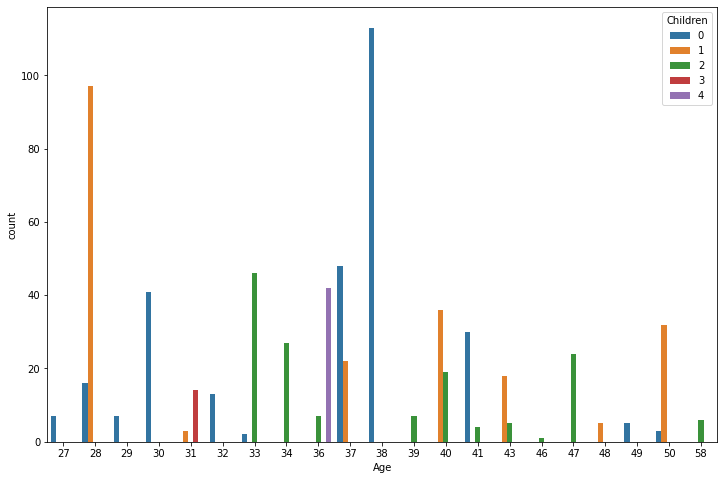

In [506]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Age',hue='Children')

<AxesSubplot:xlabel='Pets', ylabel='count'>

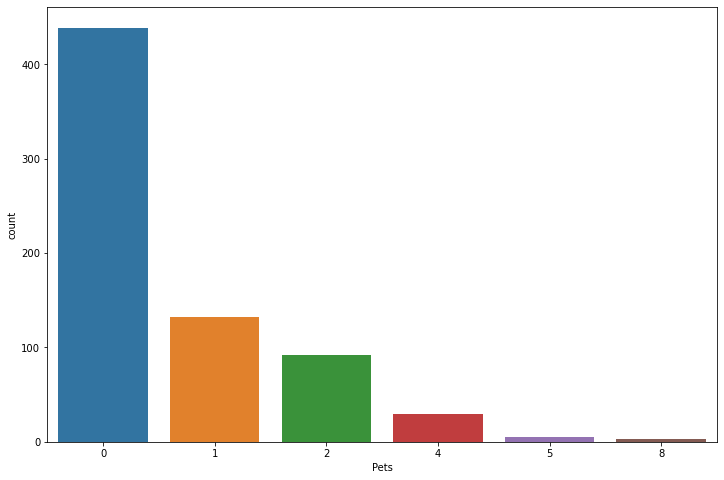

In [507]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Pets')

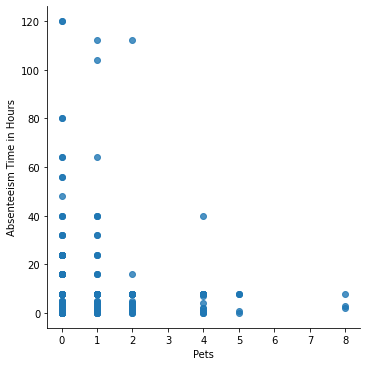

In [508]:
sns.lmplot(data=df,x='Pets',y='Absenteeism Time in Hours',fit_reg=False)

<AxesSubplot:xlabel='Children', ylabel='count'>

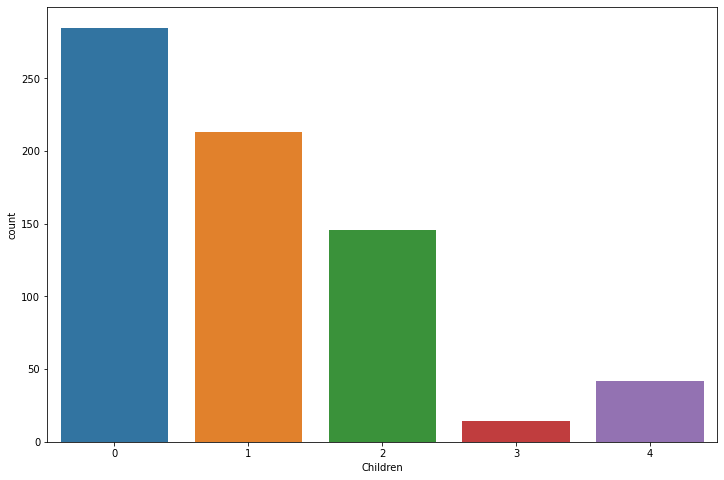

In [509]:
plt.figure(figsize=(12,8))
sns.countplot(data=df,x='Children')

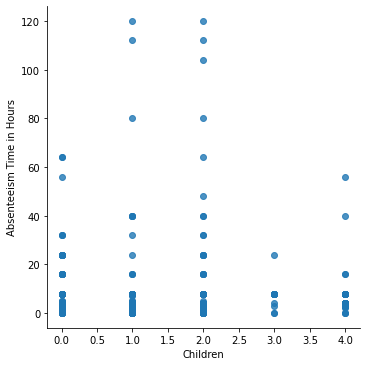

In [510]:
sns.lmplot(data=df,x='Children',y='Absenteeism Time in Hours',fit_reg=False)

In [511]:
targets = np.where(df['Absenteeism Time in Hours'] > df['Absenteeism Time in Hours'].median(),1,0)

In [512]:
df['Excessive Absenteeism'] = targets

In [513]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0
2,0,0,0,1,7,2,179,51,38,239.554,31,0,0,0,2,0
3,1,0,0,0,7,3,279,5,39,239.554,24,0,2,0,4,1
4,0,0,0,1,7,3,289,36,33,239.554,30,0,2,1,2,0


In [514]:
df = df.drop(['Absenteeism Time in Hours','Day of the week','Daily Work Load Average','Distance to Work'],axis=1)

In [515]:
unscaled_inputs = df.iloc[:,0:-1]

In [516]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler


class CustomScaler(BaseEstimator,TransformerMixin): 

    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        self.scaler = StandardScaler(copy,with_mean,with_std)
        self.columns = columns
        self.mean_ = None
        self.var_ = None
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    

    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [517]:
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Transportation Expense', 'Age', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [518]:
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [519]:
absenteeism_scaler = CustomScaler(columns_to_scale)
absenteeism_scaler.fit(unscaled_inputs)
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [520]:
scaled_inputs

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Transportation Expense,Age,Body Mass Index,Education,Children,Pets
0,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
1,0,0,0,0,0.182726,-1.574681,2.130803,1.002633,0,-0.019280,-0.589690
2,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
3,1,0,0,0,0.182726,0.854936,0.405184,-0.643782,0,0.880469,-0.589690
4,0,0,0,1,0.182726,1.005844,-0.536062,0.767431,0,0.880469,0.268487
5,0,0,0,1,0.182726,-0.654143,0.248310,1.002633,0,-0.919030,-0.589690
6,0,0,0,1,0.182726,2.092381,-1.320435,0.061825,0,-0.019280,2.843016
7,0,0,0,1,0.182726,0.568211,-0.065439,-0.878984,0,2.679969,-0.589690
8,0,0,1,0,0.182726,-1.016322,-0.379188,-0.408580,0,0.880469,-0.589690
9,0,0,0,1,0.182726,0.190942,0.091435,0.532229,1,-0.019280,0.268487


In [521]:
from sklearn.model_selection import train_test_split

In [522]:
X = scaled_inputs
y = targets

In [523]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=20)

In [524]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [525]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [526]:
reg.score(X_train,y_train)

0.7732142857142857

In [527]:
model_outputs = reg.predict(X_train)

In [528]:
feature_name = unscaled_inputs.columns.values

summary_table = pd.DataFrame(columns=['Feature Name'], data=feature_name)

summary_table['Coefficient'] = np.transpose(reg.coef_)

summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept',reg.intercept_[0]]
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [529]:
summary_table = summary_table.sort_index()
summary_table

,Feature Name,Coefficient,Odds_ratio
0,Intercept,-1.647455,0.192539
1,Reason_1,2.800197,16.447892
2,Reason_2,0.951884,2.590585
3,Reason_3,3.115553,22.545903
4,Reason_4,0.839001,2.314054
5,Month Value,0.158930,1.172256
6,Transportation Expense,0.605284,1.831773
7,Age,-0.169891,0.843757
8,Body Mass Index,0.279811,1.322880
9,Education,-0.210533,0.810152


In [530]:
pred = reg.predict(X_test)

In [531]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        74
           1       0.75      0.70      0.72        66

    accuracy                           0.75       140
   macro avg       0.75      0.75      0.75       140
weighted avg       0.75      0.75      0.75       140



In [532]:
predicted_proba = reg.predict_proba(X_test)

In [533]:
predicted_proba

array([[0.71340413, 0.28659587],
       [0.58724228, 0.41275772],
       [0.44020821, 0.55979179],
       [0.78159464, 0.21840536],
       [0.08410854, 0.91589146],
       [0.33487603, 0.66512397],
       [0.29984576, 0.70015424],
       [0.13103971, 0.86896029],
       [0.78625404, 0.21374596],
       [0.74903632, 0.25096368],
       [0.49397598, 0.50602402],
       [0.22484913, 0.77515087],
       [0.07129151, 0.92870849],
       [0.73178133, 0.26821867],
       [0.30934135, 0.69065865],
       [0.5471671 , 0.4528329 ],
       [0.55052275, 0.44947725],
       [0.5392707 , 0.4607293 ],
       [0.40201117, 0.59798883],
       [0.05361575, 0.94638425],
       [0.7003009 , 0.2996991 ],
       [0.78159464, 0.21840536],
       [0.42037128, 0.57962872],
       [0.42037128, 0.57962872],
       [0.24783565, 0.75216435],
       [0.74566259, 0.25433741],
       [0.51017274, 0.48982726],
       [0.85690195, 0.14309805],
       [0.20349733, 0.79650267],
       [0.78159464, 0.21840536],
       [0.